# Tarea VaR Parametrico

## Formulario

### VaR de un activo

El VaR paramétrico de un activo individual se calcula como:

$$\text{VaR}_\alpha = V_0 \cdot \sigma \cdot z_\alpha \cdot \sqrt{t}$$

Donde:
- $V_0$ = Valor inicial de la inversión
- $\sigma$ = Volatilidad (desviación estándar) de los retornos del activo
- $z_\alpha$ = Valor crítico de la distribución normal estándar para el nivel de confianza $\alpha$
- $t$ = Horizonte temporal (en días, si $\sigma$ es diaria)

**Nota:** Para retornos logarítmicos, también se puede expresar como:
$$\text{VaR}_\alpha = V_0 \cdot (\mu \cdot t - \sigma \cdot z_\alpha \cdot \sqrt{t})$$

Donde $\mu$ es el retorno esperado.

### VaR de un portafolio

Para un portafolio de $n$ activos, el VaR considera la correlación entre los activos:

$$\text{VaR}_\alpha = z_\alpha \cdot \sqrt{t} \cdot \sqrt{\mathbf{w}^T \Sigma \mathbf{w}} \cdot V_P$$

Donde:
- $\mathbf{w}$ = Vector de pesos de cada activo en el portafolio
- $\Sigma$ = Matriz de covarianzas de los retornos
- $V_P$ = Valor total del portafolio
- $z_\alpha$ = Valor crítico de la distribución normal
- $t$ = Horizonte temporal

**Para dos activos:**
$$\sigma_P = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho_{12}\sigma_1\sigma_2}$$

$$\text{VaR}_\alpha = V_P \cdot \sigma_P \cdot z_\alpha \cdot \sqrt{t}$$

Donde $\rho_{12}$ es el coeficiente de correlación entre los activos 1 y 2.

### VaR de un Bono

El VaR de un bono se calcula utilizando la **duración modificada**:

$$\text{VaR}_\alpha = V_0 \cdot D_{mod} \cdot \Delta y \cdot z_\alpha \cdot \sqrt{t}$$

Donde:
- $V_0$ = Valor actual del bono
- $D_{mod}$ = Duración modificada del bono: $D_{mod} = \frac{D}{1+y}$
- $\Delta y$ = Volatilidad del rendimiento (yield)
- $z_\alpha$ = Valor crítico de la distribución normal
- $t$ = Horizonte temporal

**Aproximación lineal del cambio en el precio:**
$$\Delta P \approx -D_{mod} \cdot P_0 \cdot \Delta y$$

**Para mayor precisión, se puede incluir la convexidad:**
$$\Delta P \approx -D_{mod} \cdot P_0 \cdot \Delta y + \frac{1}{2} \cdot C \cdot P_0 \cdot (\Delta y)^2$$

Donde $C$ es la convexidad del bono.

#### Fórmulas Adicionales de Bonos

1. Duración (Duración Macaulay, $D$)
$$D = \frac{\sum_{t=1}^{T} t \cdot \frac{CF_t}{(1+y)^t}}{V_0}$$

2. Duración Modificada ($D_{mod}$)
$$D_{mod} = \frac{D}{1+y}$$

3. Convexidad ($C$)
$$C = \frac{1}{V_0} \cdot \sum_{t=1}^{T} \frac{CF_t}{(1+y)^t} \cdot [t^2 + t]$$

### VaR de una Opción

El VaR de una opción se calcula usando las **griegas** (método Delta-Normal):

**Aproximación Delta:**
$$\text{VaR}_\alpha = \Delta \cdot S_0 \cdot \sigma_S \cdot z_\alpha \cdot \sqrt{t}$$

**Aproximación Delta-Gamma (más precisa):**
$$\Delta V \approx \Delta \cdot \Delta S + \frac{1}{2} \Gamma \cdot (\Delta S)^2$$

$$\text{VaR}_\alpha = -\left(\Delta \cdot S_0 \cdot z_\alpha \cdot \sigma_S \cdot \sqrt{t} + \frac{1}{2}\Gamma \cdot S_0^2 \cdot \sigma_S^2 \cdot t \cdot z_\alpha^2\right)$$

Donde:
- $\Delta$ = Sensibilidad del precio de la opción respecto al precio del subyacente
- $\Gamma$ = Segunda derivada del precio de la opción respecto al subyacente
- $S_0$ = Precio actual del activo subyacente
- $\sigma_S$ = Volatilidad del activo subyacente
- $z_\alpha$ = Valor crítico de la distribución normal
- $t$ = Horizonte temporal

**Otras griegas relevantes para el riesgo:**
- **Vega** ($\mathcal{V}$): Sensibilidad a cambios en la volatilidad implícita
- **Theta** ($\Theta$): Sensibilidad al paso del tiempo
- **Rho** ($\rho$): Sensibilidad a cambios en la tasa de interés


[griegas](https://es.wikipedia.org/wiki/Griegas_(finanzas))



---

## Valores críticos comunes ($z_\alpha$)

| Nivel de confianza | $\alpha$ | $z_\alpha$ |
|-------------------|----------|-----------|
| 90% | 0.10 | 1.28 |
| 95% | 0.05 | 1.645 |
| 99% | 0.01 | 2.326 |
| 99.5% | 0.005 | 2.576 |


# Ejercicios VaR en Python

## Ejercicio 1: VaR de un Activo Individual

**Contexto:** Eres analista de riesgos en una casa de bolsa mexicana. Un cliente ha invertido $1,000,000 MXN en acciones de América Móvil (AMX).

**Datos:**
- Inversión inicial: $1,000,000 MXN
- Volatilidad diaria (σ): 2.5%
- Retorno diario promedio (μ): 0.08%
- Horizonte: 1 día
- Nivel de confianza: 95%

**Tareas:**
1. Calcula el VaR paramétrico a 1 día con 95% de confianza
2. Calcula el VaR a 10 días (ajustando por √t)
3. Interpreta el resultado: ¿Qué significa este VaR para el inversionista?
4. Crea una visualización que muestre la distribución de posibles pérdidas y marca el VaR

**Bonus:** Calcula el VaR para diferentes niveles de confianza (90%, 95%, 99%) y compara.




### Respuestas:

1. VaR (1 día, 95%): $41,121.34 MXN

2. VaR (10 días, 95%): $130,037.10 MXN


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
import pandas as pd
from math import log, sqrt, exp

In [18]:
# Datos
V0, sigma, mu = 1000000, 0.025, 0.0008
z_95 = norm.ppf(0.95)

# VaR 1 día y 10 días
VaR_1d = V0 * sigma * z_95
VaR_10d = VaR_1d * sqrt(10)
print(f"VaR 1 día (95%): ${VaR_1d:,.2f} MXN")
print(f"VaR 10 días (95%): ${VaR_10d:,.2f} MXN")

VaR 1 día (95%): $41,121.34 MXN
VaR 10 días (95%): $130,037.10 MXN


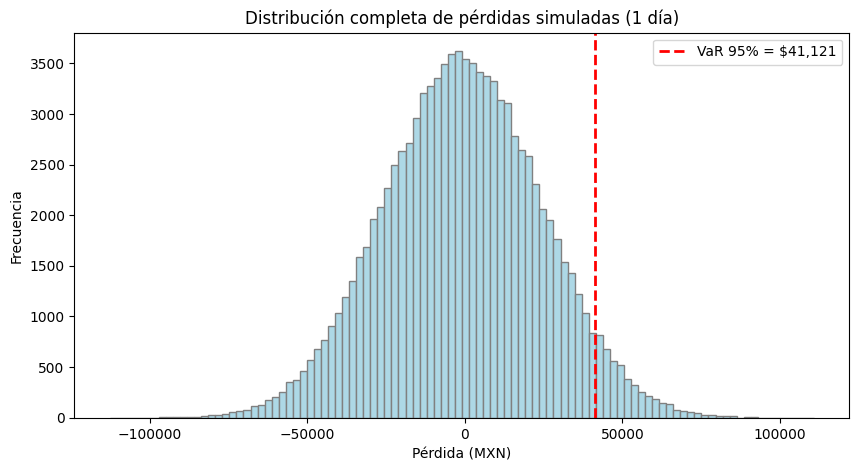

In [21]:
#Gráfica
np.random.seed(42)
pnl = V0 * np.random.normal(mu, sigma, 100000)
plt.figure(figsize=(10,5))
plt.hist(-pnl, bins=100, color="lightblue", edgecolor="gray")
plt.axvline(VaR_1d, color='red', linestyle='--', linewidth=2, label=f'VaR 95% = ${VaR_1d:,.0f}')
plt.title("Distribución completa de pérdidas simuladas (1 día)")
plt.xlabel("Pérdida (MXN)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

**¿Qué significa este VaR para el inversionista?**

El VaR le permite al inversionista:

- Entender el riesgo potencial asociado a su posición.

- Tomar decisiones informadas sobre su tolerancia al riesgo.

- Comparar riesgos entre diferentes activos o portafolios.

En resumen, el VaR no predice exactamente cuánto se perderá, sino que indica el límite de pérdida esperado con cierto nivel de confianza.


---

## Ejercicio 2: VaR de un Portafolio

**Contexto:** Administras un portafolio diversificado de dos activos mexicanos.

**Datos del Portafolio:**
- **Activo A (WALMEX):**
  - Inversión: $600,000 MXN (60%)
  - Volatilidad diaria: 1.8%
  - Retorno diario promedio: 0.05%

- **Activo B (CEMEX):**
  - Inversión: $400,000 MXN (40%)
  - Volatilidad diaria: 3.2%
  - Retorno diario promedio: 0.12%

- **Correlación entre A y B:** ρ = 0.45
- **Valor total del portafolio:** $1,000,000 MXN
- **Nivel de confianza:** 95%
- **Horizonte:** 1 día

**Tareas:**
1. Calcula la volatilidad del portafolio usando la fórmula de dos activos
2. Calcula el VaR del portafolio
3. Calcula el VaR individual de cada activo
4. Compara: VaR del portafolio vs suma de VaRs individuales. ¿Por qué son diferentes?
5. Crea una matriz de covarianzas y usa álgebra matricial para calcular el VaR (si no lo hiciste asi)

**Bonus:** Grafica cómo varía el VaR del portafolio en función de los pesos (w₁ de 0% a 100%).



### Respuestas:

1. Volatilidad del portafolio: 2.0122% diaria
2. VaR del Portafolio (1 día, 95%): $33,097.79 MXN

3.
    - VaR Activo A (WALMEX): $17,764.42 MXN

    - VaR Activo B (CEMEX): $21,054.13 MXN

In [24]:
w_A = 0.6
w_B = 0.4
sigma_A = 0.018
sigma_B = 0.032
rho = 0.45         # Correlación entre A y B
mu_A = 0.0005      # Retorno promedio WALMEX
mu_B = 0.0012      # Retorno promedio CEMEX
V_total = 1_000_000
z_95 = 1.65
h = 1

#Volatilidad del portafolio
sigma_p = np.sqrt(
    (w_A**2)*(sigma_A**2) +
    (w_B**2)*(sigma_B**2) +
    2*w_A*w_B*sigma_A*sigma_B*rho
)
print(f"Volatilidad del portafolio: {sigma_p*100:.4f}% diaria")

Volatilidad del portafolio: 2.0122% diaria


In [25]:
#VaR del portafolio (1 día, 95%)
VaR_port = V_total * (z_95 * sigma_p - (w_A*mu_A + w_B*mu_B))
print(f"VaR del Portafolio (95%, 1 día): ${VaR_port:,.2f} MXN")

VaR del Portafolio (95%, 1 día): $32,421.35 MXN


In [26]:
#VaR individual de cada activo
VaR_A = 600_000 * (z_95 * sigma_A - mu_A)
VaR_B = 400_000 * (z_95 * sigma_B - mu_B)
print(f"VaR Activo A (WALMEX): ${VaR_A:,.2f} MXN")
print(f"VaR Activo B (CEMEX): ${VaR_B:,.2f} MXN")

VaR Activo A (WALMEX): $17,520.00 MXN
VaR Activo B (CEMEX): $20,640.00 MXN


In [27]:
#Comparación
suma_VaRs = VaR_A + VaR_B
print(f"Suma de VaRs individuales: ${suma_VaRs:,.2f} MXN")
print(f"Diferencia con VaR Portafolio: ${suma_VaRs - VaR_port:,.2f} MXN")

Suma de VaRs individuales: $38,160.00 MXN
Diferencia con VaR Portafolio: $5,738.65 MXN


In [28]:
#Matriz de covarianzas
cov_AB = rho * sigma_A * sigma_B
cov_matrix = np.array([[sigma_A**2, cov_AB],
                       [cov_AB, sigma_B**2]])
print("\nMatriz de Covarianzas:")
print(pd.DataFrame(cov_matrix, columns=["A", "B"], index=["A", "B"]))


Matriz de Covarianzas:
          A         B
A  0.000324  0.000259
B  0.000259  0.001024


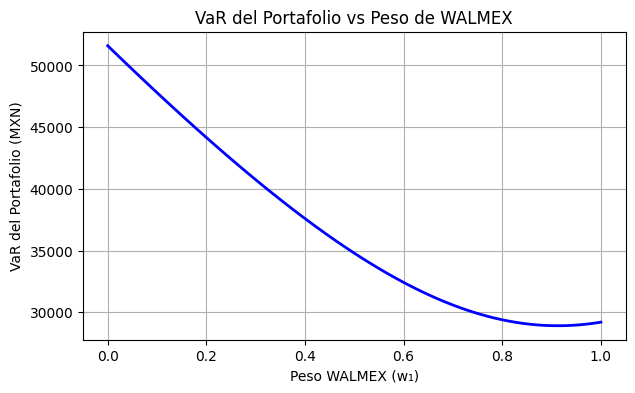

In [29]:
#Gráfica VaR en función de los pesos
weights = np.linspace(0, 1, 100)
VaRs = []

for w in weights:
    sigma_p = np.sqrt(
        (w**2)*(sigma_A**2) +
        ((1-w)**2)*(sigma_B**2) +
        2*w*(1-w)*sigma_A*sigma_B*rho
    )
    VaR_p = V_total * (z_95 * sigma_p - (w*mu_A + (1-w)*mu_B))
    VaRs.append(VaR_p)

plt.figure(figsize=(7,4))
plt.plot(weights, VaRs, color='blue', lw=2)
plt.title('VaR del Portafolio vs Peso de WALMEX')
plt.xlabel('Peso WALMEX (w₁)')
plt.ylabel('VaR del Portafolio (MXN)')
plt.grid(True)
plt.show()

**Compara: VaR del portafolio vs suma de VaRs individuales. ¿Por qué son diferentes?**

El VaR del portafolio es menor que la suma de los VaR individuales porque los dos activos no se mueven igual todos los días.
Como no están totalmente relacionados, cuando uno baja, el otro puede subir o bajar menos, lo que hace que el riesgo total sea menor.
Esto lo llamamos diversificación, y ayuda a reducir las pérdidas posibles del inversionista.

---

## Ejercicio 3: VaR de un Bono

**Contexto:** El banco tiene una posición en bonos gubernamentales mexicanos (MBONOS).

**Datos del Bono:**
- Valor nominal: $10,000,000 MXN
- Precio actual: 98.5 (como % del valor nominal)
- Cupón: 8% anual
- Años al vencimiento: 5 años
- Yield actual: 8.5%
- Duración de Macaulay: 4.2 años
- Convexidad: 21.5
- Volatilidad del yield (σᵧ): 0.15% diaria
- Nivel de confianza: 99%
- Horizonte: 1 día

**Tareas:**
1. Calcula el valor de mercado actual del bono
2. Calcula la duración modificada
3. Calcula el VaR usando solo duración modificada
4. Calcula el VaR usando duración y convexidad
5. Compara ambos resultados. ¿Cuándo es importante incluir la convexidad?

**Bonus:** Crea una función que calcule el VaR de un bono dados sus parámetros básicos.



### Respuestas:
   1. Valor de mercado del bono: $9,850,000.00 MXN

   2. Duración modificada: 3.8710 años

   3. VaR (duración solamente, 99%, 1 día): $133,052.09 MXN

   4. VaR (duración + convexidad, 99%, 1 día): $131,762.72 MXN


In [33]:
nominal = 10_000_000
precio_pct = 98.5/100
V = nominal * precio_pct
y = 0.085            # yield anual
D_mac = 4.2          # años
Conv = 21.5          # convexidad anual
sigma_y = 0.0015
z = 2.326347874      # 99%

In [35]:
#Valor de mercado
print(f"Valor de mercado del bono: ${V:,.2f} MXN")

Valor de mercado del bono: $9,850,000.00 MXN


In [37]:
#Duración modificada
D_mod = D_mac / (1 + y)
print(f"Duración modificada: {D_mod:.4f} años")

Duración modificada: 3.8710 años


In [39]:
#VaR usando solo duración
dy = z * sigma_y
VaR_dur = V * D_mod * dy
print(f"VaR (solo duración, 99%, 1 día): ${VaR_dur:,.2f} MXN")

VaR (solo duración, 99%, 1 día): $133,052.09 MXN


In [41]:
#VaR usando duración + convexidad
VaR_dur_conv = V * (D_mod*dy - 0.5*Conv*(dy**2))
print(f"VaR (duración + convexidad, 99%, 1 día): ${VaR_dur_conv:,.2f} MXN")

VaR (duración + convexidad, 99%, 1 día): $131,762.72 MXN


In [42]:
#Diferencia
print(f"\nDiferencia (Duración - Duración+Convexidad): ${VaR_dur - VaR_dur_conv:,.2f} MXN")


Diferencia (Duración - Duración+Convexidad): $1,289.37 MXN


**Compara ambos resultados. ¿Cuándo es importante incluir la convexidad?**

El VaR con duración sola es un poco mayor que el que incluye convexidad.
La convexidad corrige la estimación y muestra una pérdida ligeramente menor.

---

## Ejercicio 4: VaR de una Opción

**Contexto:** Un trader mantiene una posición en opciones call sobre el índice S&P/BMV IPC.

**Datos de la Opción:**
- Tipo: Call Europea
- Cantidad: 100 contratos
- Precio del subyacente (S₀): $55,000 puntos

- Strike (K): $54,000 puntos
- Tiempo al vencimiento: 30 días (T = 30/252)
- Tasa libre de riesgo (r): 10% anual
- Volatilidad implícita (σ): 18% anual
- Nivel de confianza: 95%
- Horizonte de VaR: 1 día

**Griegas calculadas:**
- Delta (Δ): 0.65
- Gamma (Γ): 0.00003
- Vega (ν): 150 (por punto de volatilidad)
- Theta (Θ): -25 (pérdida diaria por paso del tiempo)

**Tareas:**
1. Calcula el precio de la opción usando Black-Scholes
2. Calcula el valor de la posición (100 contratos)
3. Calcula el VaR usando aproximación Delta
4. Calcula el VaR usando aproximación Delta-Gamma
5. Compara ambos métodos. ¿Cuándo es importante incluir Gamma?
---

### Respuestas

1. Precio de la opción Call: 2,317.83 puntos
2. Valor total de la posición: 231,782.92 puntos
3. VaR (aproximación Delta, 95%, 1 día): 66,676.92 puntos
4. VaR (aproximación Delta-Gamma, 95%, 1 día): 68,255.32 puntos

In [49]:
S0 = 55000
K = 54000
r = 0.10
sigma = 0.18
T = 30/252       # Tiempo al vencimiento (en años)
n = 100
z_95 = 1.65
Delta = 0.65
Gamma = 0.00003
Vega = 150
Theta = -25      # pérdida diaria

In [50]:
#Precio de la opción con Black-Scholes
d1 = (log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma * sqrt(T))
d2 = d1 - sigma * sqrt(T)
call_price = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

print(f"Precio de la opción Call: {call_price:,.2f} puntos")

Precio de la opción Call: 2,317.83 puntos


In [51]:
#Valor total de la posición (100 contratos)
V_total = call_price * n
print(f"Valor total de la posición: {V_total:,.2f} puntos")

Valor total de la posición: 231,782.92 puntos


In [52]:
#VaR usando solo Delta
sigma_1d = sigma / np.sqrt(252)

In [55]:
# VaR (Delta)
VaR_delta = abs(Delta * S0 * sigma_1d * z_95) * n
print(f"VaR (aprox. Delta, 95%, 1 día): {VaR_delta:,.2f} puntos")

VaR (aprox. Delta, 95%, 1 día): 66,885.54 puntos


In [56]:
#VaR usando Delta + Gamma
VaR_dg = abs((Delta * S0 * sigma_1d * z_95) +
             (0.5 * Gamma * (S0 * sigma_1d * z_95)**2)) * n
print(f"VaR (aprox. Delta-Gamma, 95%, 1 día): {VaR_dg:,.2f} puntos")

VaR (aprox. Delta-Gamma, 95%, 1 día): 68,473.83 puntos


In [57]:
#Comparación
print(f"\nDiferencia entre métodos: {abs(VaR_delta - VaR_dg):,.2f} puntos")


Diferencia entre métodos: 1,588.29 puntos


**Compara ambos métodos. ¿Cuándo es importante incluir Gamma?**

Se usa Delta-Gamma cuando hay no linealidad relevante (grandes movimientos o opciones muy sensibles). Con movimientos pequeños, Delta solo suele bastar.